# Fast Matching Experiments

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Imports

In [2]:
from utils.fast_match import *

Using cache found in /home/mati/.cache/torch/hub/yxgeee_OpenIBL_master


## Data

In [3]:
random.seed(42)
np.random.seed(42)
cv2.setRNGSeed(42)
os.environ["PYTHONHASHSEED"] = "42"

In [4]:
data_df = pd.read_csv("data/nearest_places_mapping.csv")
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.head(300)

## ORB - Baseline

In [5]:
%%time
ORB_baseline_results = get_baseline(data_df, "ORB", nfeatures=500, ratio_thresh=0.75)

Processing View: 0
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:08<00:00, 34.00it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:07<00:00, 40.26it/s]


Calculating distances


100%|██████████| 300/300 [01:13<00:00,  4.06it/s]


Processing View: 1
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:07<00:00, 39.32it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:07<00:00, 39.06it/s]


Calculating distances


100%|██████████| 300/300 [01:17<00:00,  3.89it/s]


Processing View: 2
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:07<00:00, 38.53it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:07<00:00, 39.59it/s]


Calculating distances


100%|██████████| 300/300 [01:21<00:00,  3.68it/s]


Processing View: 3
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:07<00:00, 37.54it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:08<00:00, 36.19it/s]


Calculating distances


100%|██████████| 300/300 [01:21<00:00,  3.68it/s]


Processing View: 4
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:08<00:00, 37.34it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:08<00:00, 36.98it/s]


Calculating distances


100%|██████████| 300/300 [01:21<00:00,  3.66it/s]

CPU times: user 1h 54s, sys: 15min 7s, total: 1h 16min 2s
Wall time: 7min 55s


In [6]:
ORB_baseline_results = get_baseline(data_df, "ORB", nfeatures=500, ratio_thresh=0.75)
orb_acc_weighted, orb_top5_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_baseline_results, top_k=5)
orb_acc_weighted, orb_top10_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_baseline_results, top_k=10)
print(f"Weighted Aggregation: Top-1 Accuracy: {orb_acc_weighted:.3f}, Top-5 Accuracy: {orb_top5_weighted:.3f}, Top-10 Accuracy: {orb_top10_weighted:.3f}")

Processing View: 0
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:01<00:00, 230.06it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:01<00:00, 243.76it/s]


Calculating distances


100%|██████████| 300/300 [01:22<00:00,  3.64it/s]


Processing View: 1
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:01<00:00, 233.06it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:01<00:00, 243.44it/s]


Calculating distances


100%|██████████| 300/300 [01:21<00:00,  3.68it/s]


Processing View: 2
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:01<00:00, 244.27it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:01<00:00, 243.39it/s]


Calculating distances


100%|██████████| 300/300 [01:22<00:00,  3.65it/s]


Processing View: 3
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:01<00:00, 235.35it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:01<00:00, 238.94it/s]


Calculating distances


100%|██████████| 300/300 [01:22<00:00,  3.64it/s]


Processing View: 4
Precomputing descriptors for locations 1


100%|██████████| 300/300 [00:01<00:00, 212.46it/s]


Precomputing descriptors for locations 2


100%|██████████| 300/300 [00:01<00:00, 220.82it/s]


Calculating distances


100%|██████████| 300/300 [01:22<00:00,  3.64it/s]


Weighted Aggregation: Top-1 Accuracy: 0.850, Top-5 Accuracy: 0.900, Top-10 Accuracy: 0.910


## ORB + Classical Feature Clustering

In [7]:
%%time
ORB_fast_results = find_images_fast(data_df, "classical", "ORB", plot=False)

CPU times: user 11min 51s, sys: 4min 56s, total: 16min 48s
Wall time: 2min 2s


In [8]:
ORB_fast_results = find_images_fast(data_df, "classical", "ORB", plot=False)
orb_acc_weighted, orb_top5_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_fast_results, top_k=5)
orb_acc_weighted, orb_top10_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_fast_results, top_k=10)
print(f"Weighted Aggregation: Top-1 Accuracy: {orb_acc_weighted:.3f}, Top-5 Accuracy: {orb_top5_weighted:.3f}, Top-10 Accuracy: {orb_top10_weighted:.3f}")

Weighted Aggregation: Top-1 Accuracy: 0.677, Top-5 Accuracy: 0.747, Top-10 Accuracy: 0.770


## ORB + Deep Feature Clustering

In [9]:
%%time
ORB_fast_results_deep = find_images_fast(data_df, "deep", "ORB", plot=False)

CPU times: user 18min 15s, sys: 5min 16s, total: 23min 31s
Wall time: 4min 24s


In [10]:
ORB_fast_results_deep = find_images_fast(data_df, "deep", "ORB", plot=False)
orb_acc_weighted, orb_top5_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_fast_results_deep, top_k=5)
orb_acc_weighted, orb_top10_weighted = evaluate_accuracy_weighted_aggregation(data_df, ORB_fast_results_deep, top_k=10)
print(f"Weighted Aggregation: Top-1 Accuracy: {orb_acc_weighted:.3f}, Top-5 Accuracy: {orb_top5_weighted:.3f}, Top-10 Accuracy: {orb_top10_weighted:.3f}")

Weighted Aggregation: Top-1 Accuracy: 0.820, Top-5 Accuracy: 0.880, Top-10 Accuracy: 0.900


## VLAD + Deep Feature Clustering

In [11]:
%%time
VLAD_fast_results_deep = find_images_fast(data_df, "deep", "VLAD", plot=False)

CPU times: user 10min 32s, sys: 771 ms, total: 10min 33s
Wall time: 4min 32s


In [12]:
VLAD_fast_results_deep = find_images_fast(data_df, "deep", "VLAD", plot=False)
VLAD_acc_weighted, VLAD_top5_weighted = deep_evaluate_accuracy_weighted_aggregation(data_df, VLAD_fast_results_deep, top_k=5)
VLAD_acc_weighted, VLAD_top10_weighted = deep_evaluate_accuracy_weighted_aggregation(data_df, VLAD_fast_results_deep, top_k=10)
print(f"Weighted Aggregation: Top-1 Accuracy: {VLAD_acc_weighted:.3f}, Top-5 Accuracy: {VLAD_top5_weighted:.3f}, Top-10 Accuracy: {VLAD_top10_weighted:.3f}")

Weighted Aggregation: Top-1 Accuracy: 0.760, Top-5 Accuracy: 0.880, Top-10 Accuracy: 0.913


## Visualizations

In [13]:
data_df = pd.read_csv("data/nearest_places_mapping.csv")
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df = data_df.head(40)

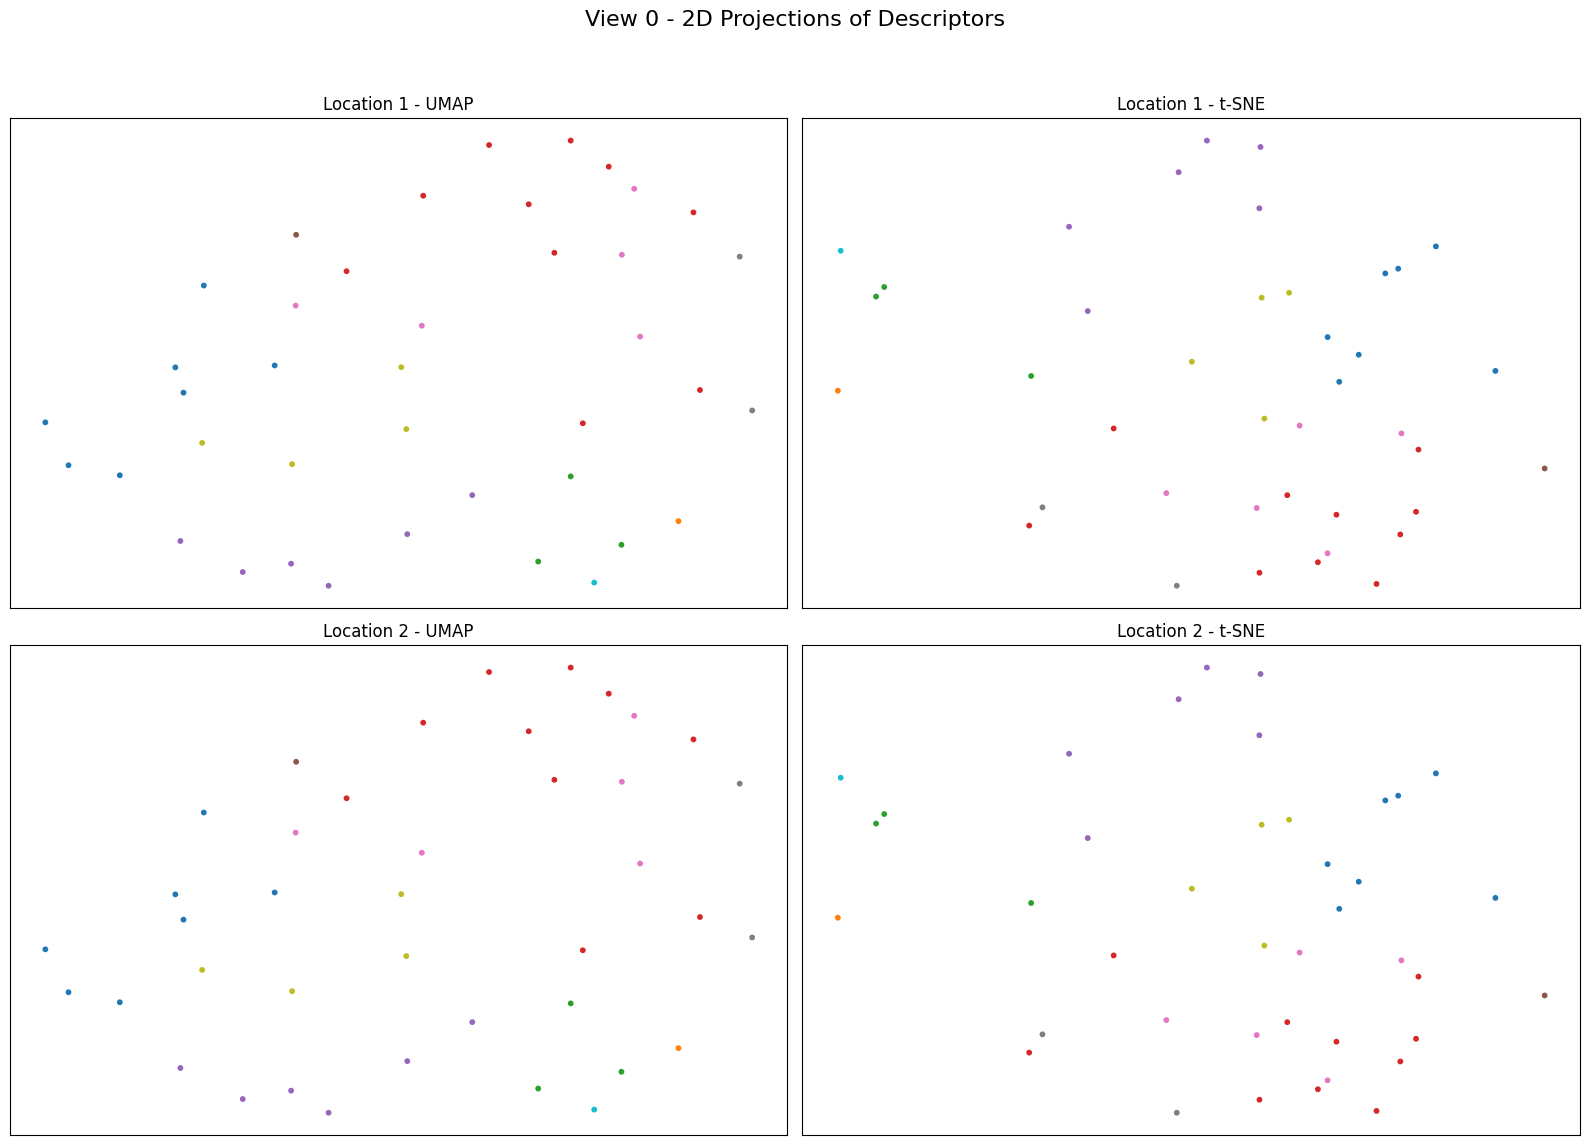

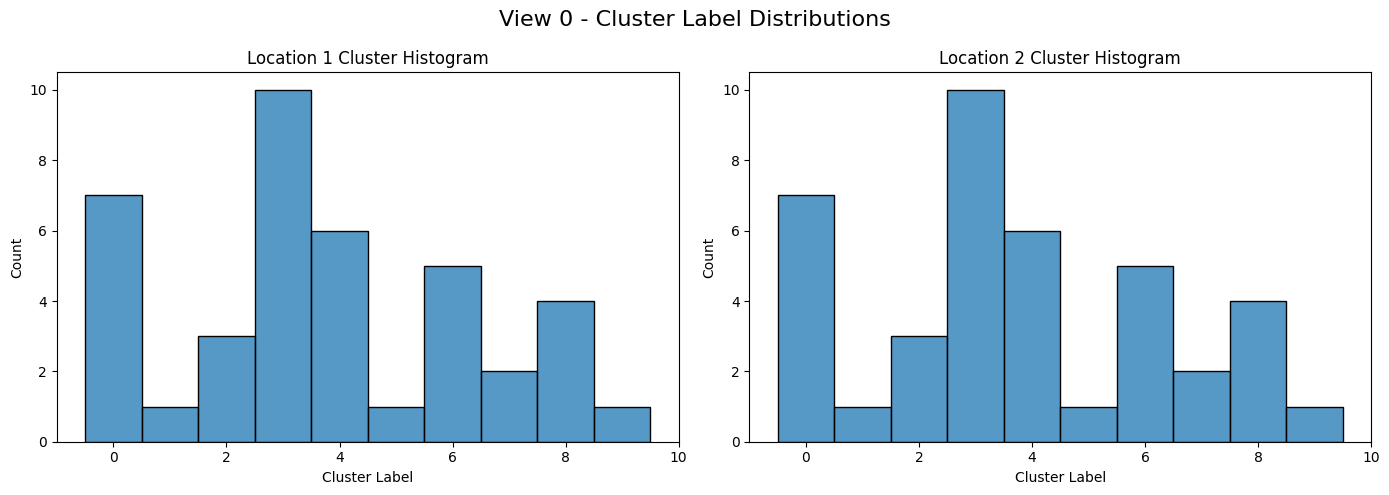

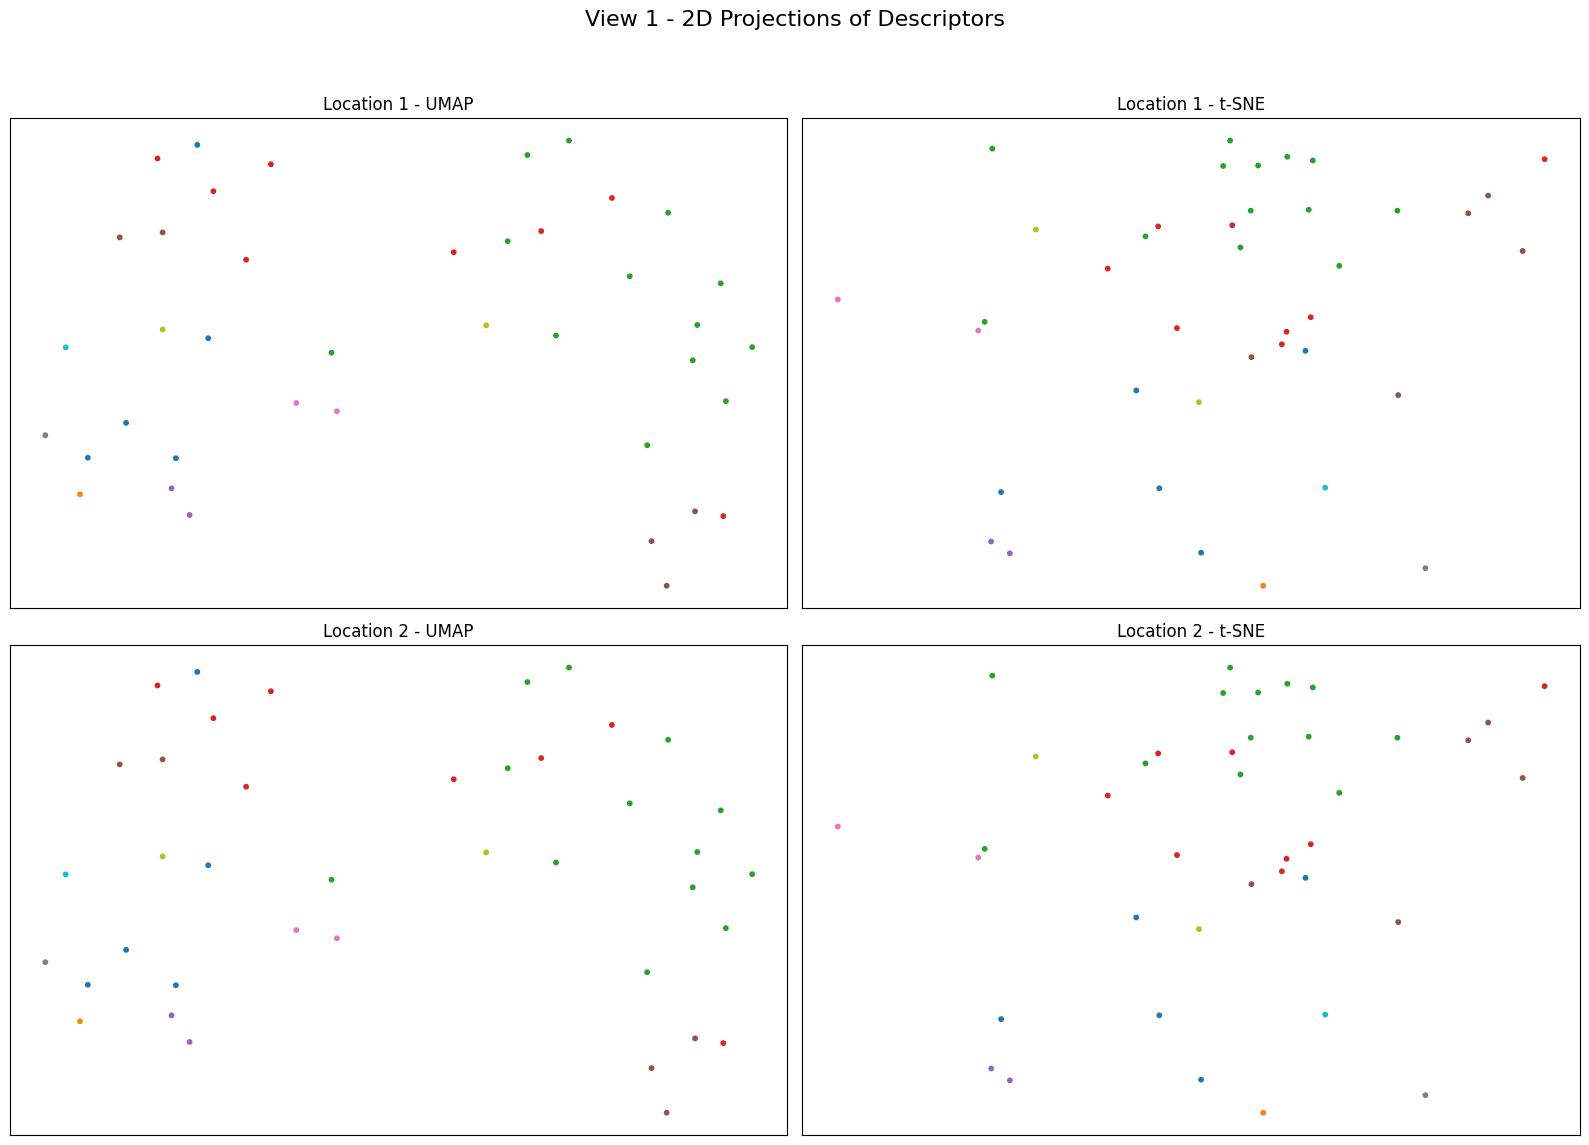

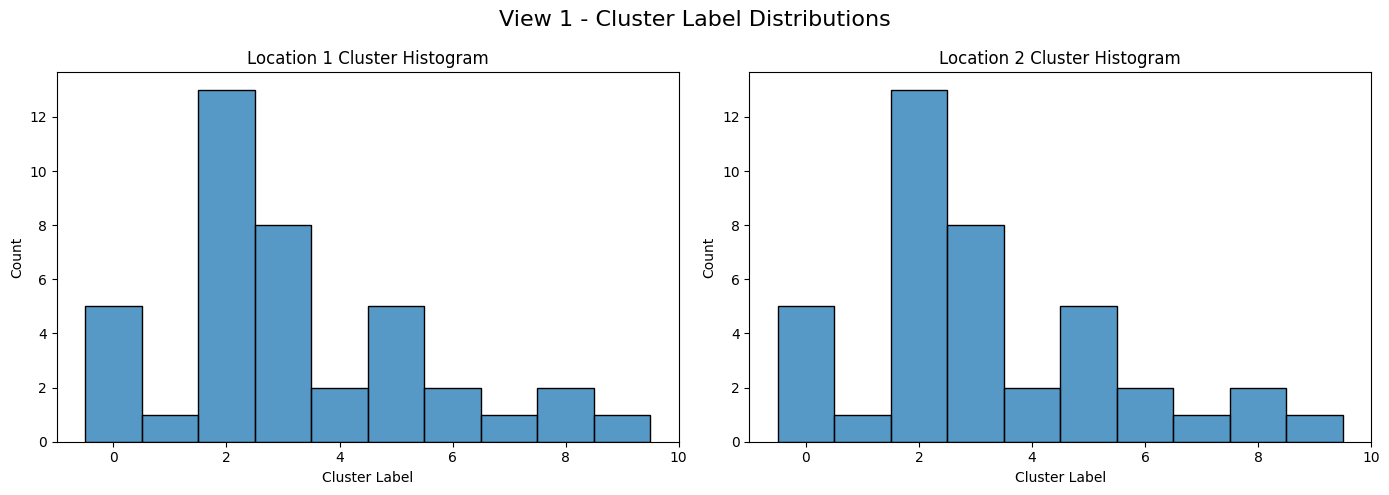

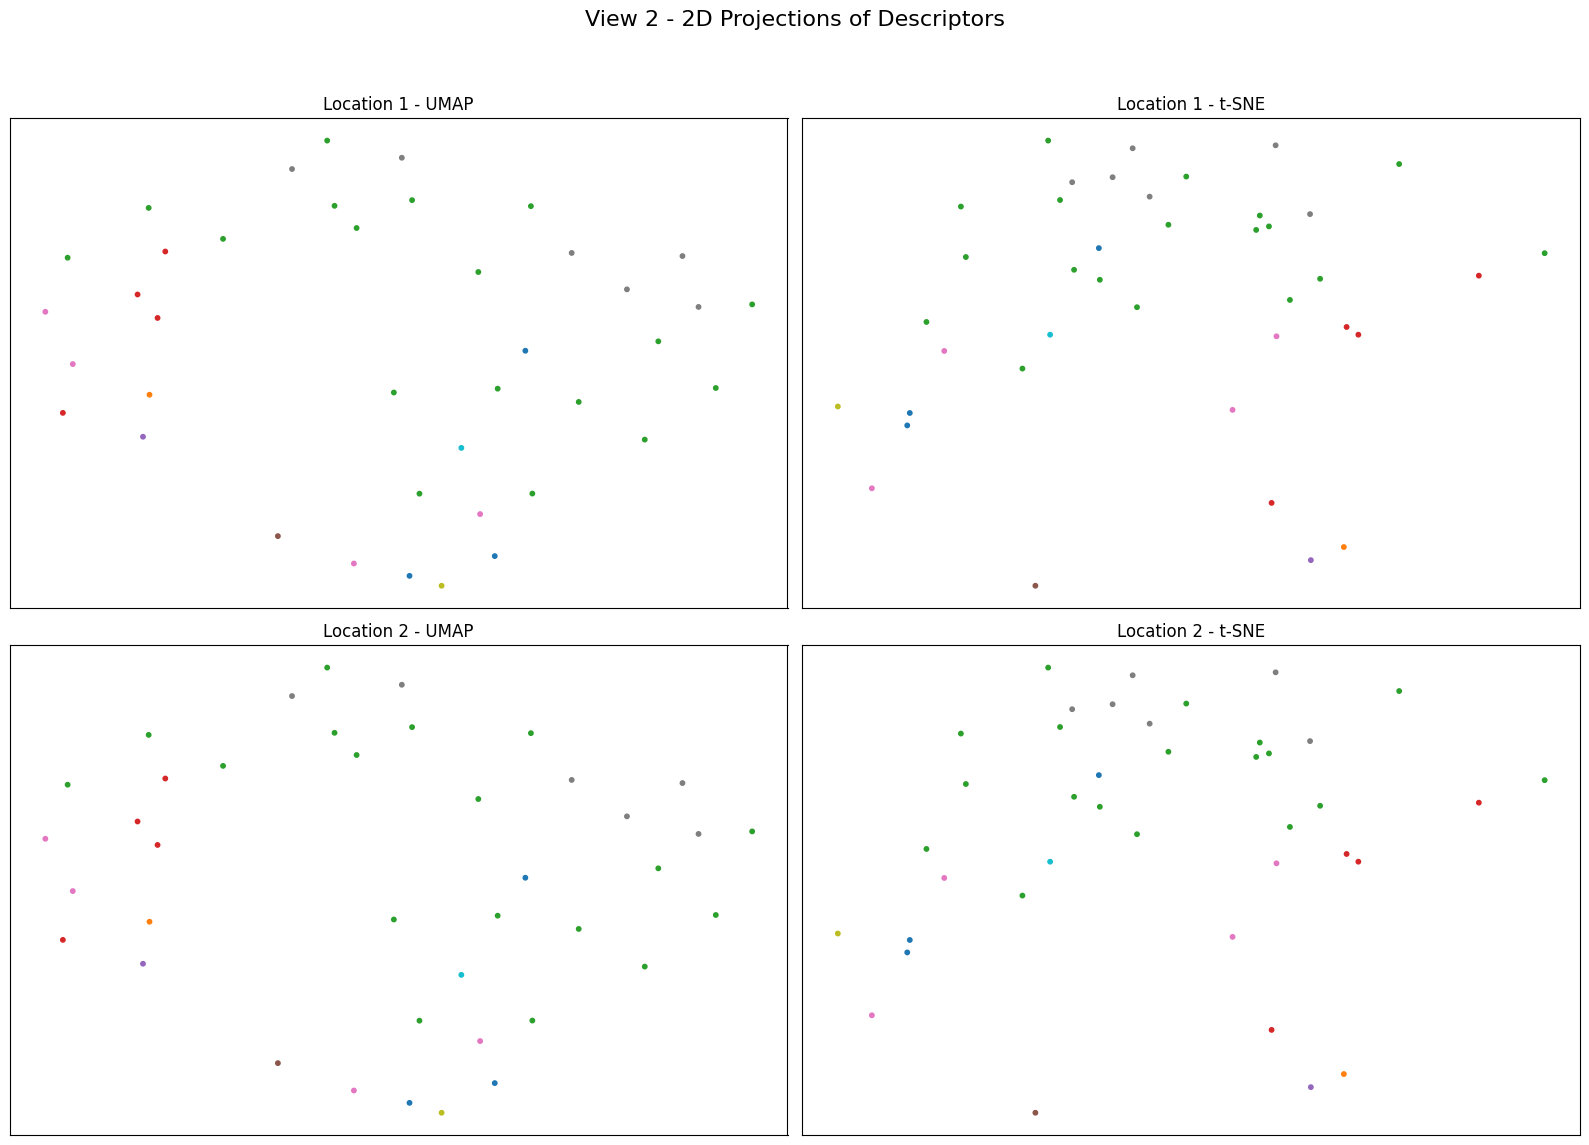

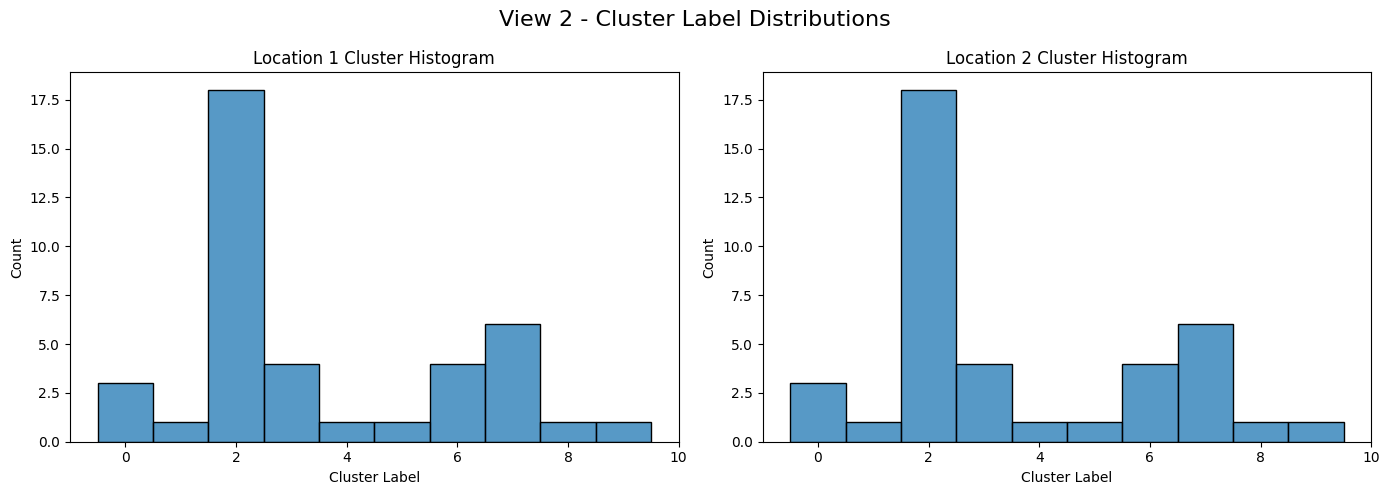

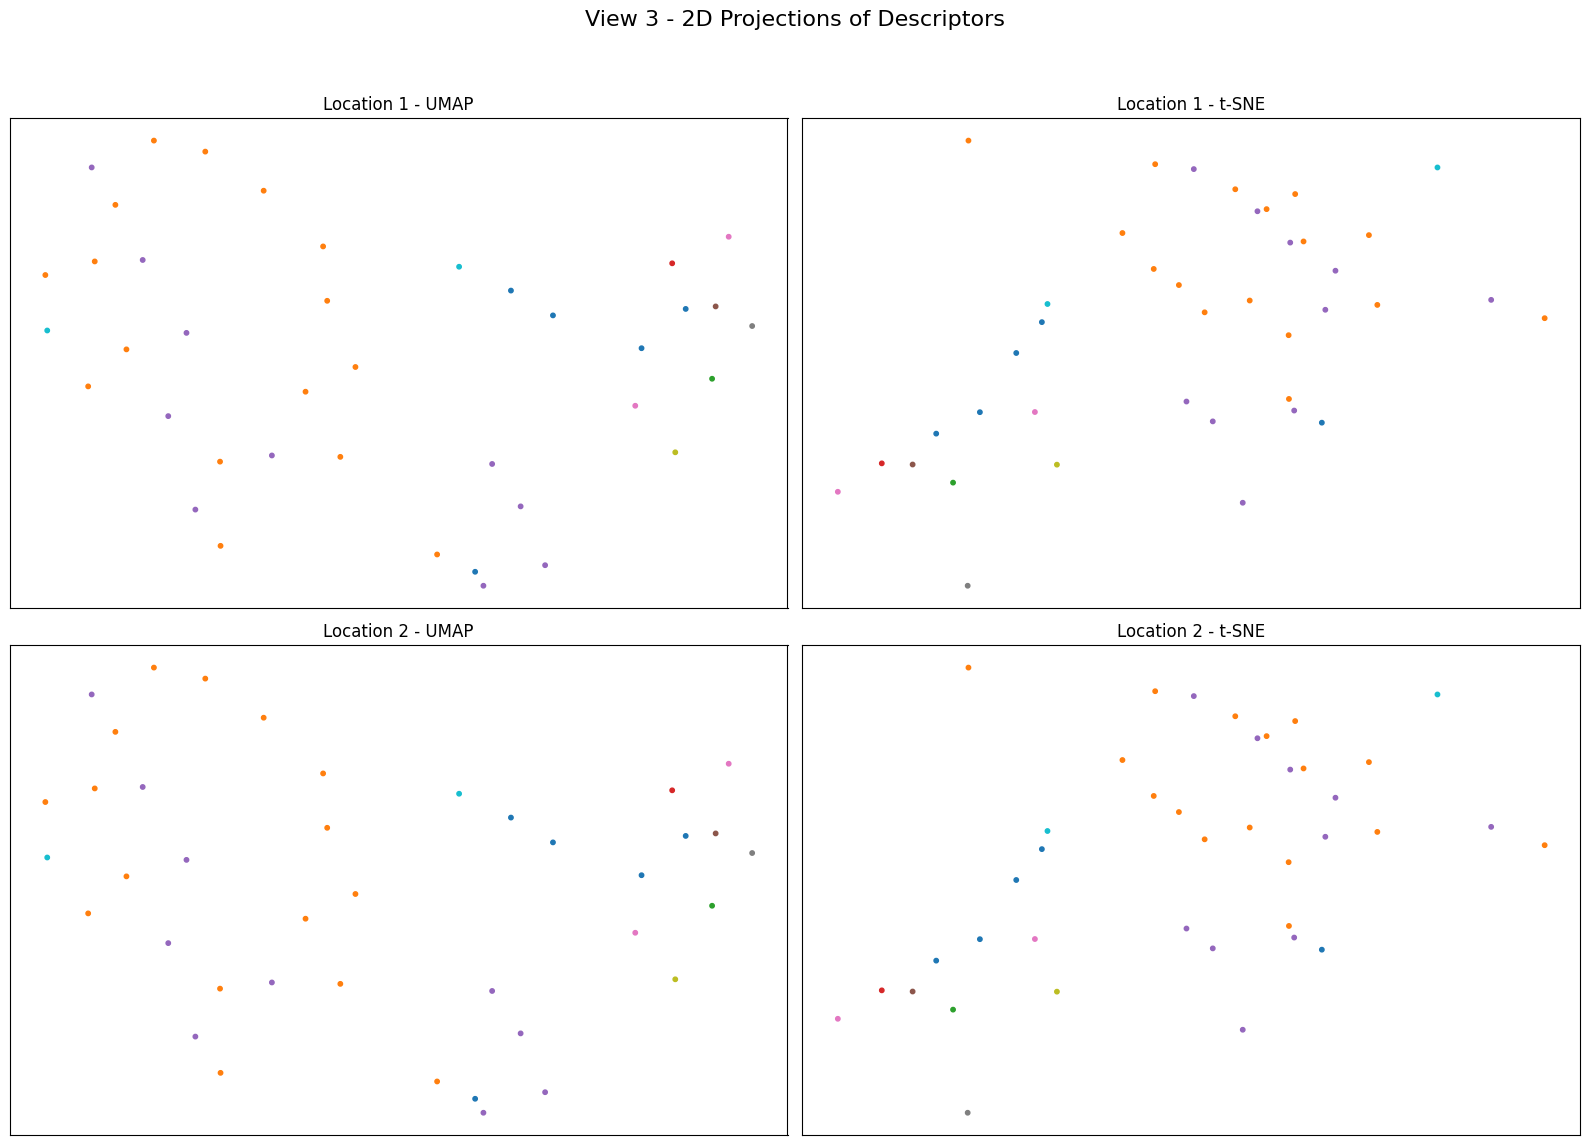

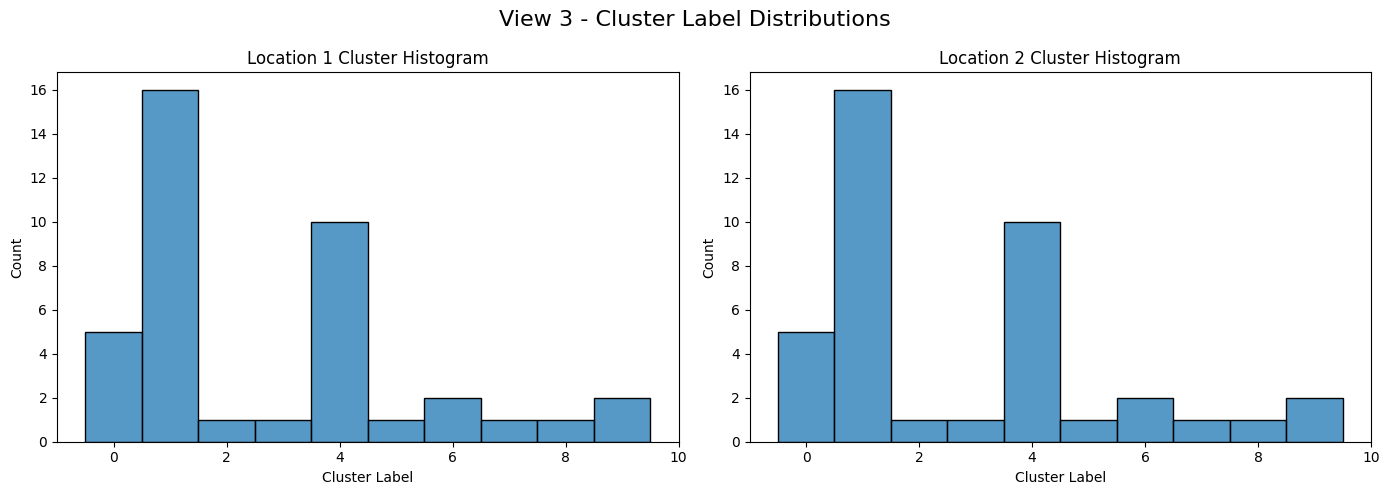

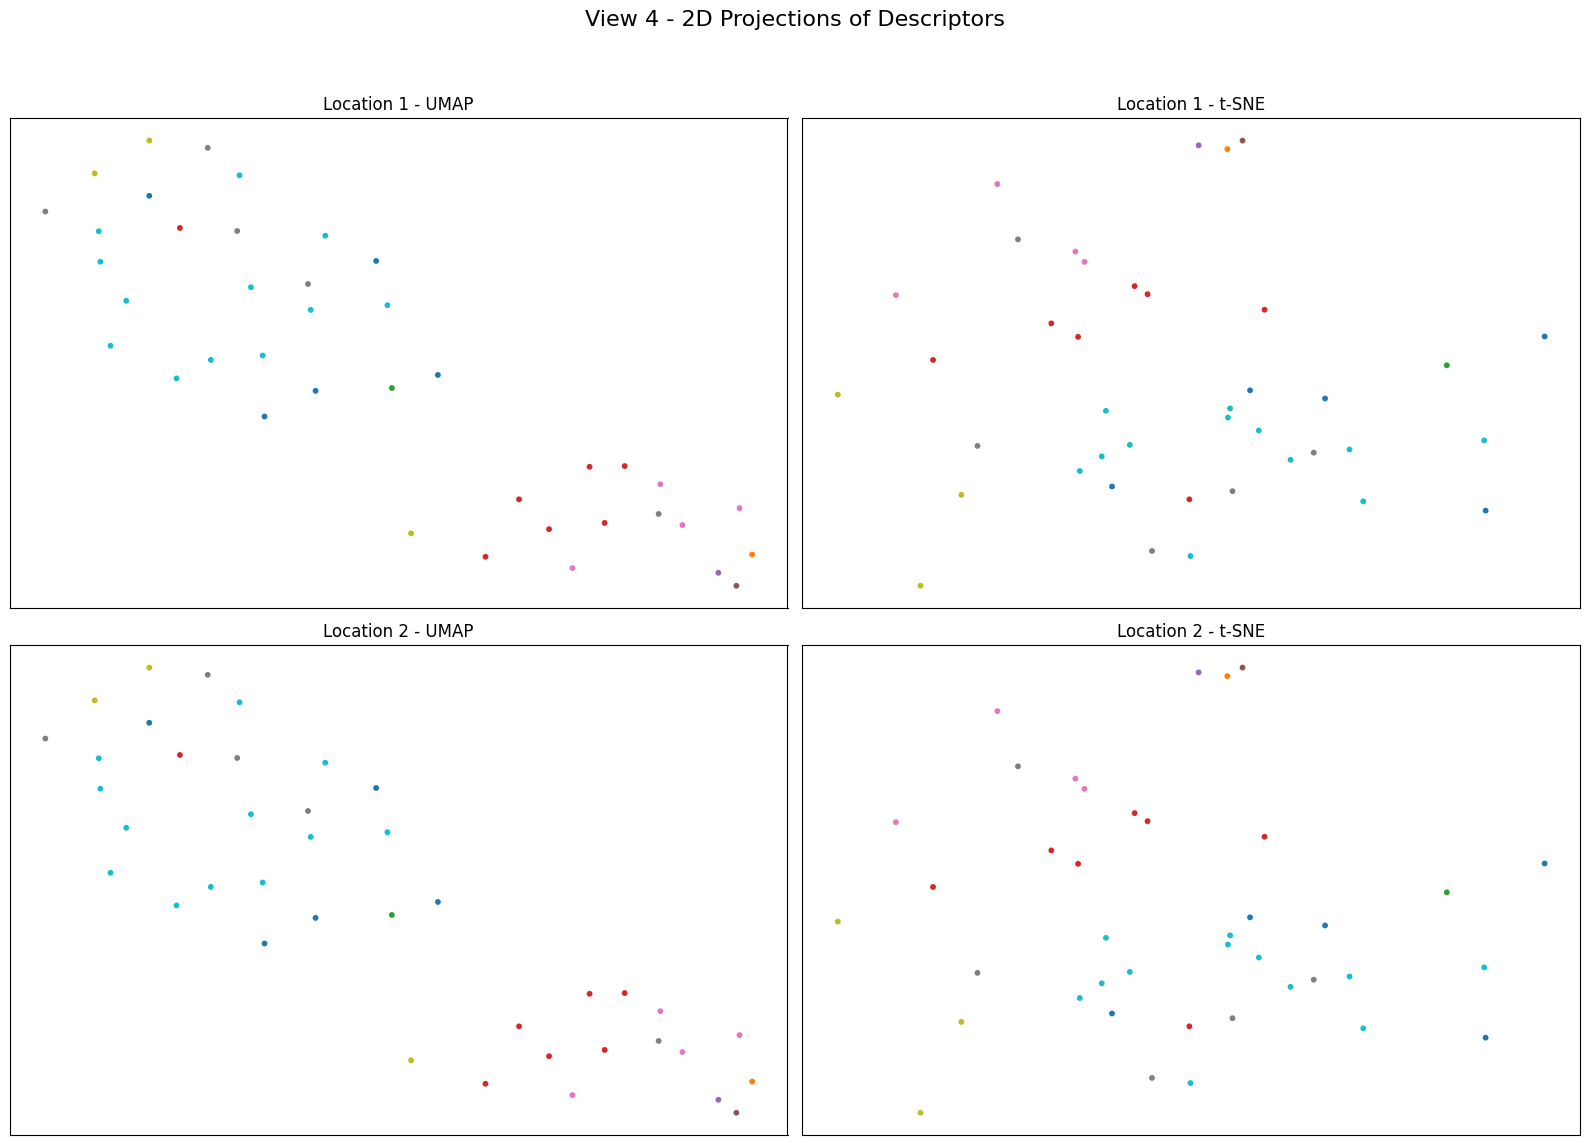

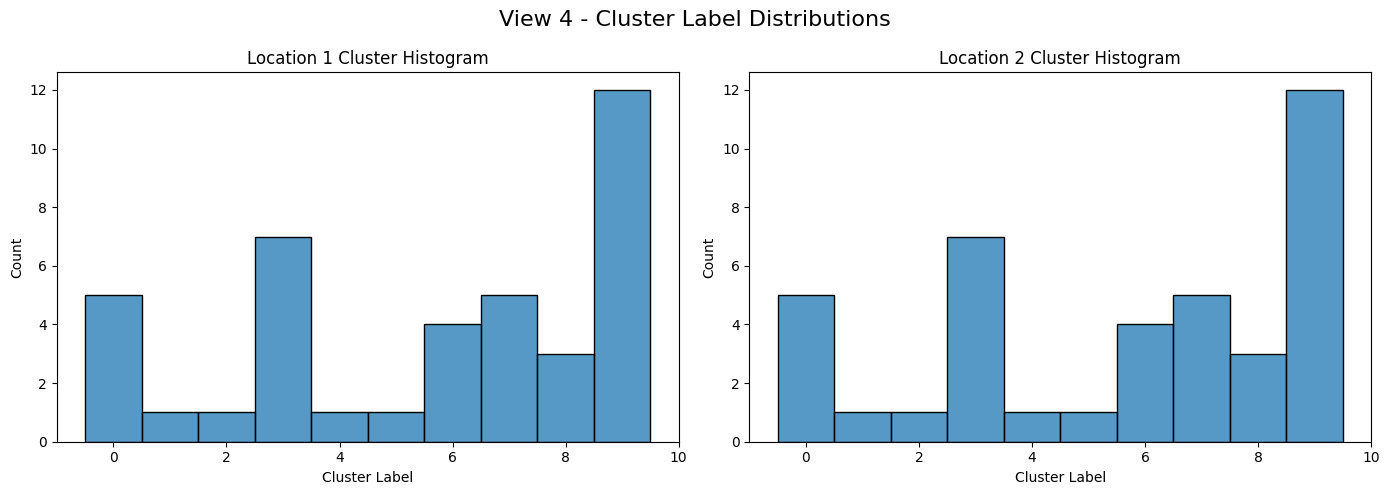

In [14]:
ORB_fast_results = find_images_fast(data_df, "classical", "ORB", plot=True)

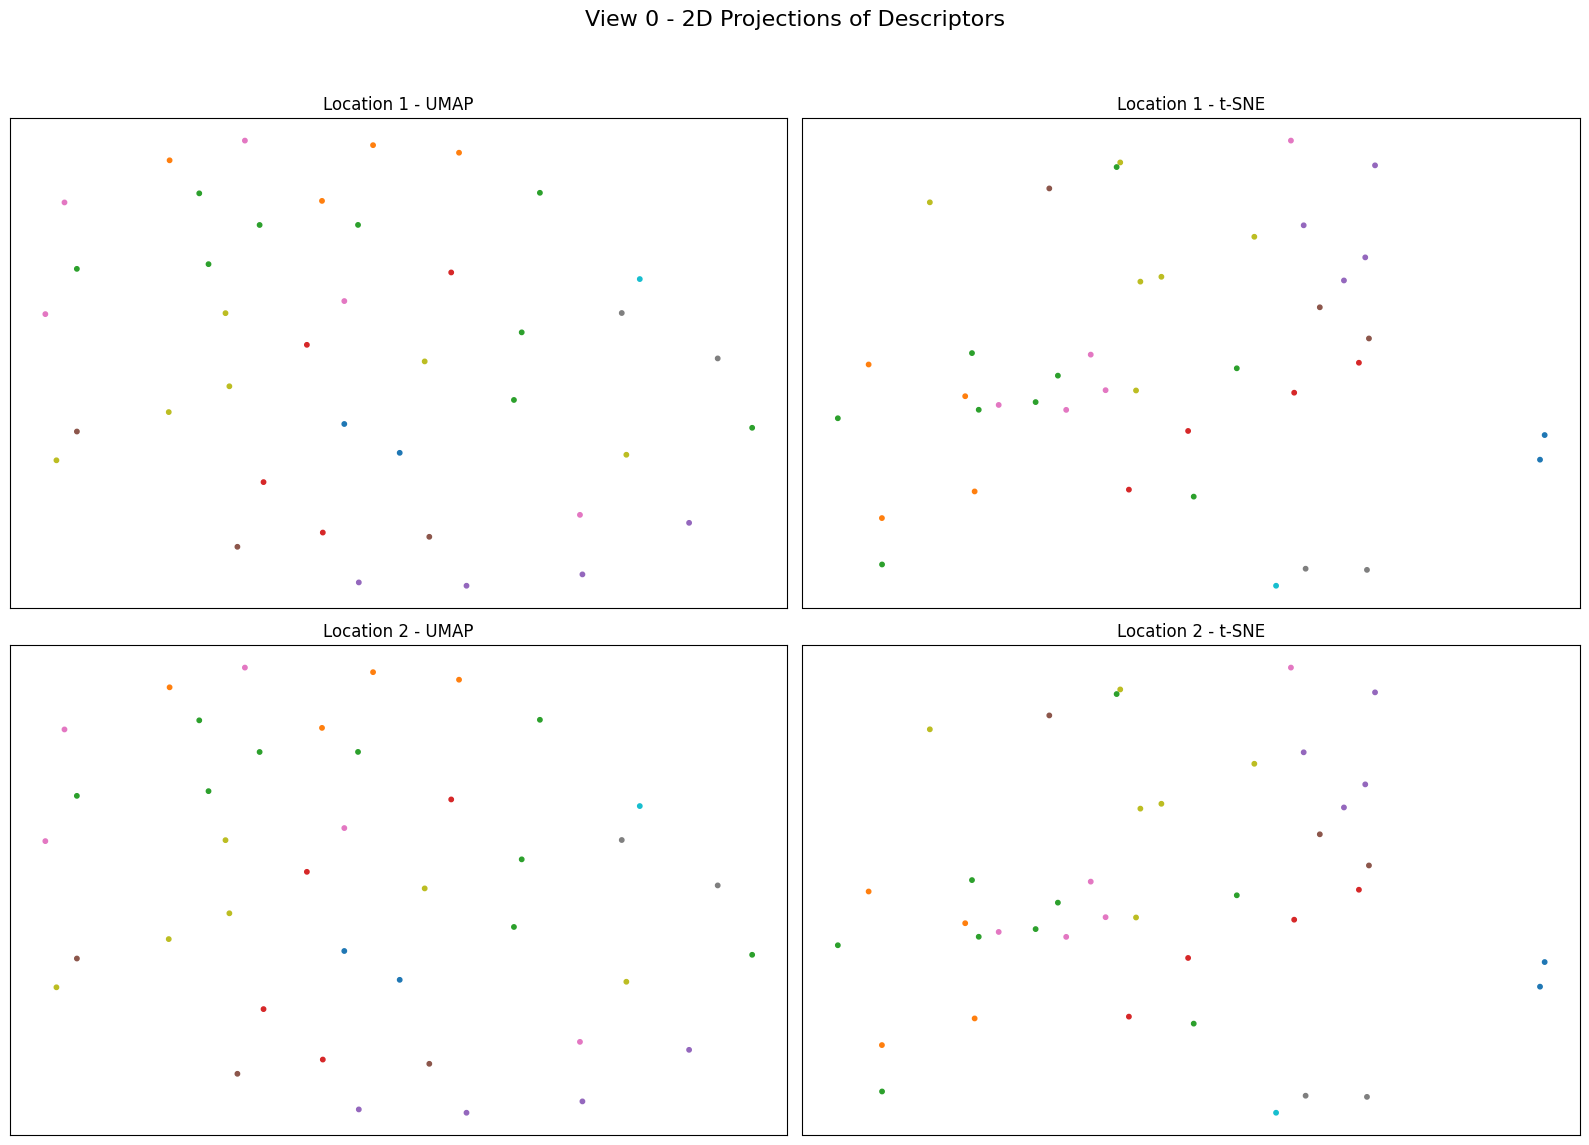

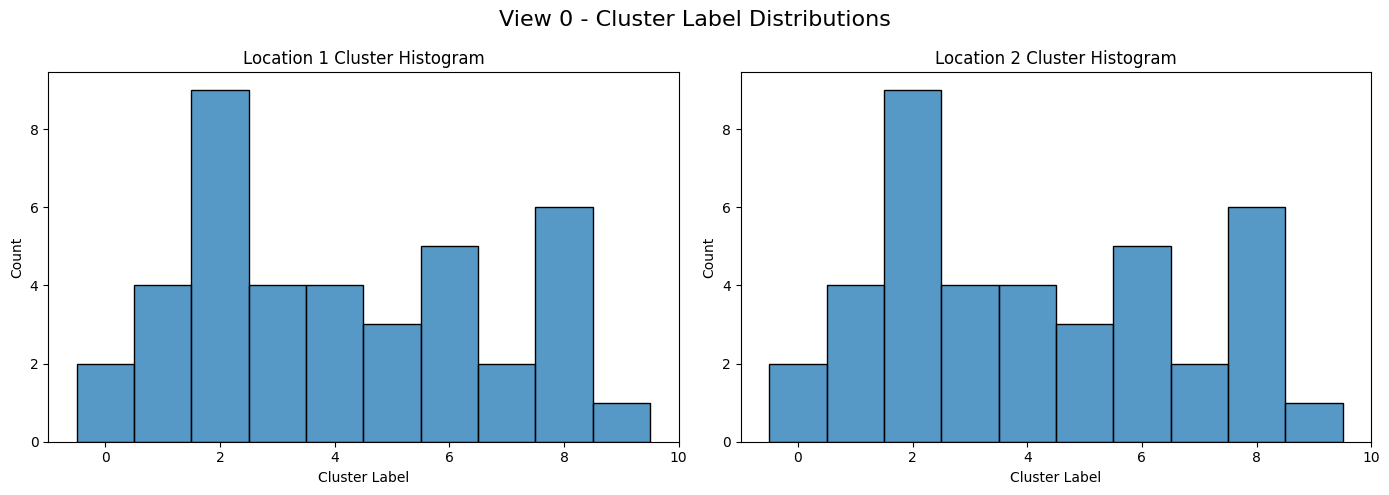

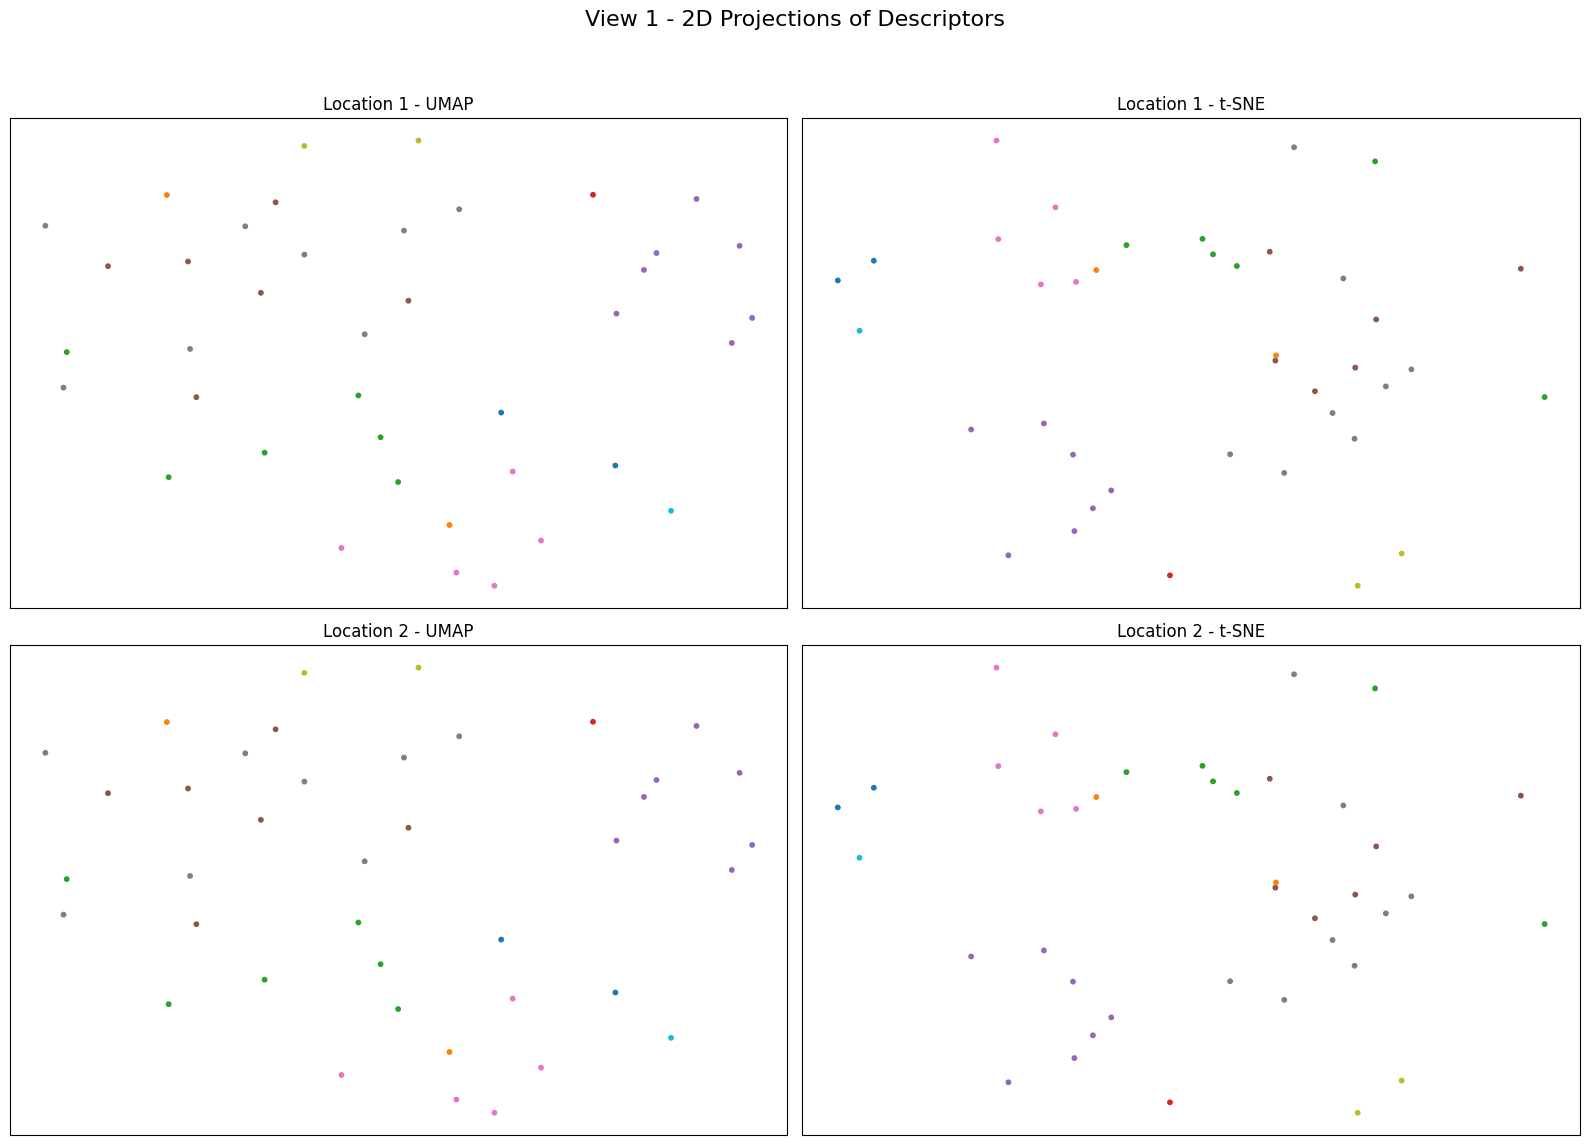

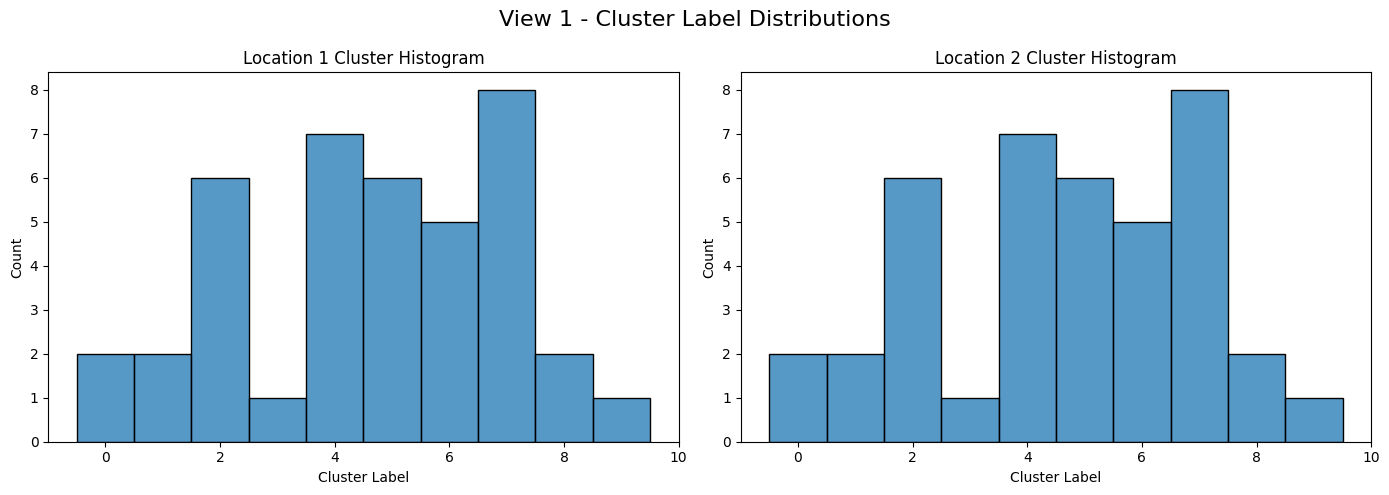

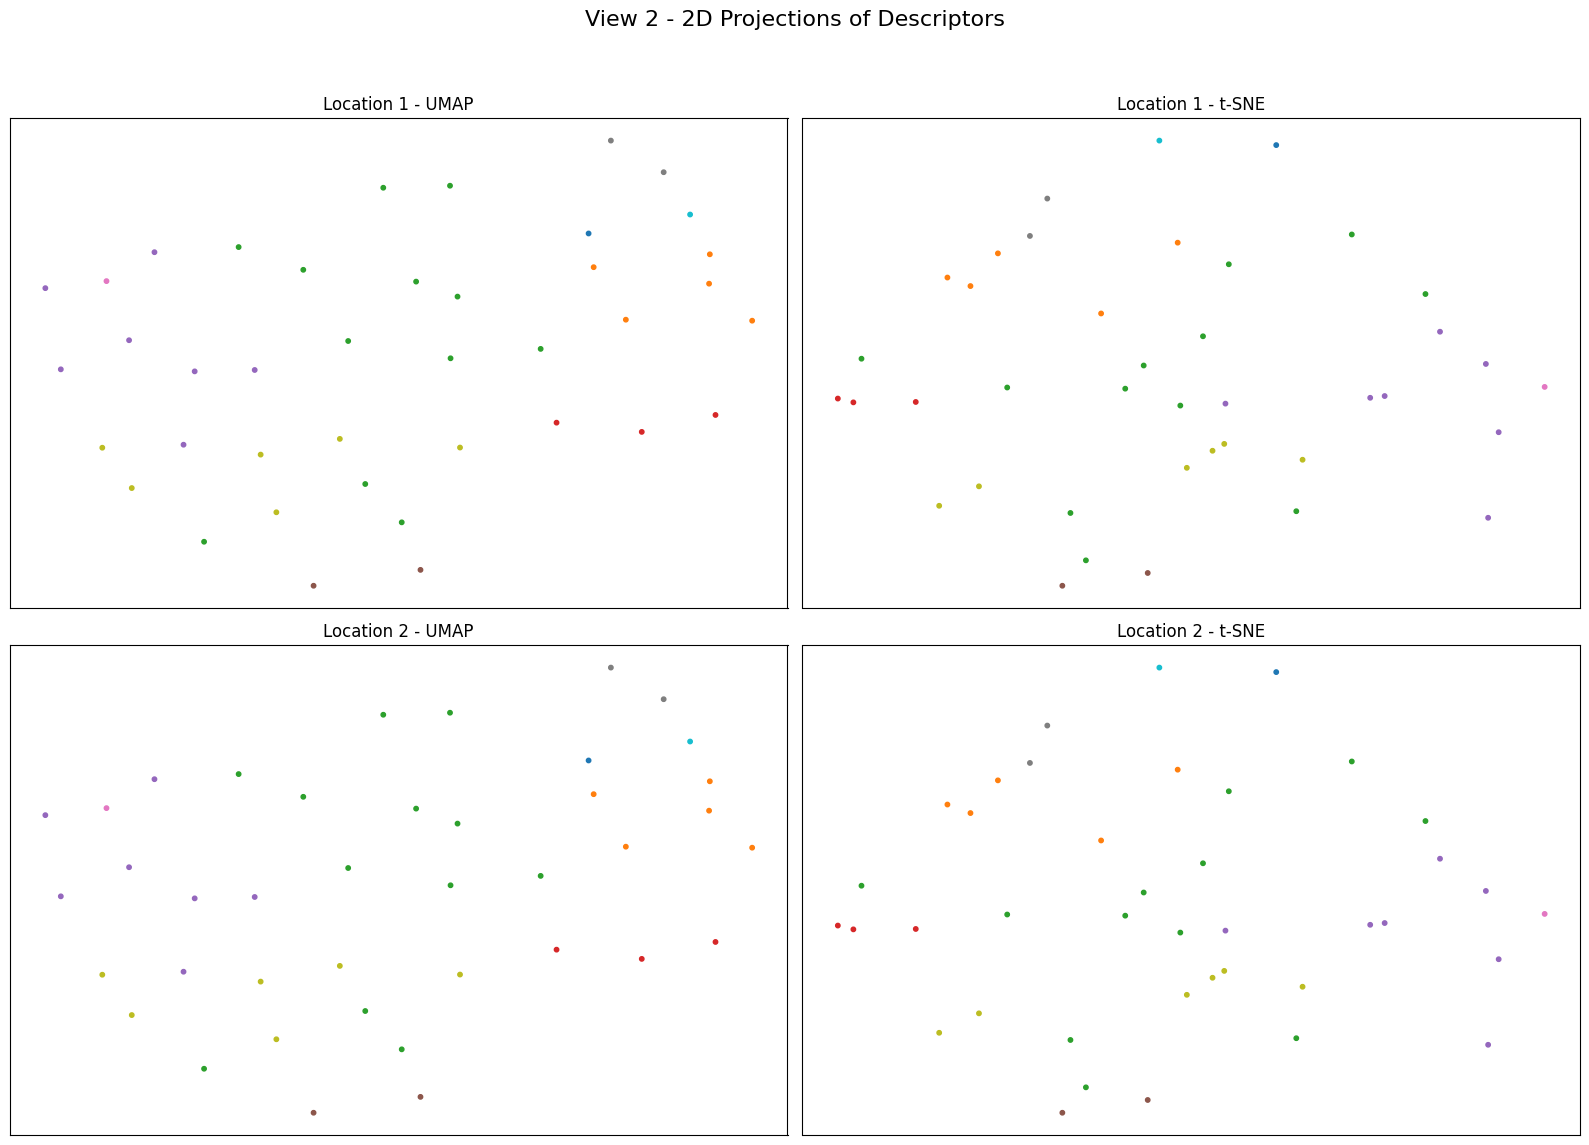

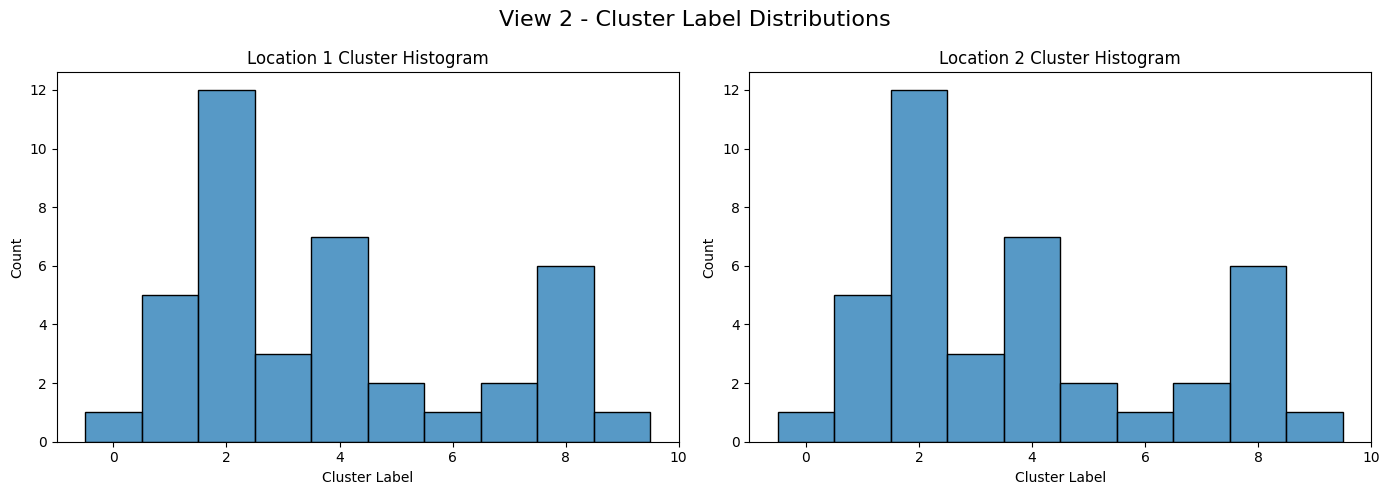

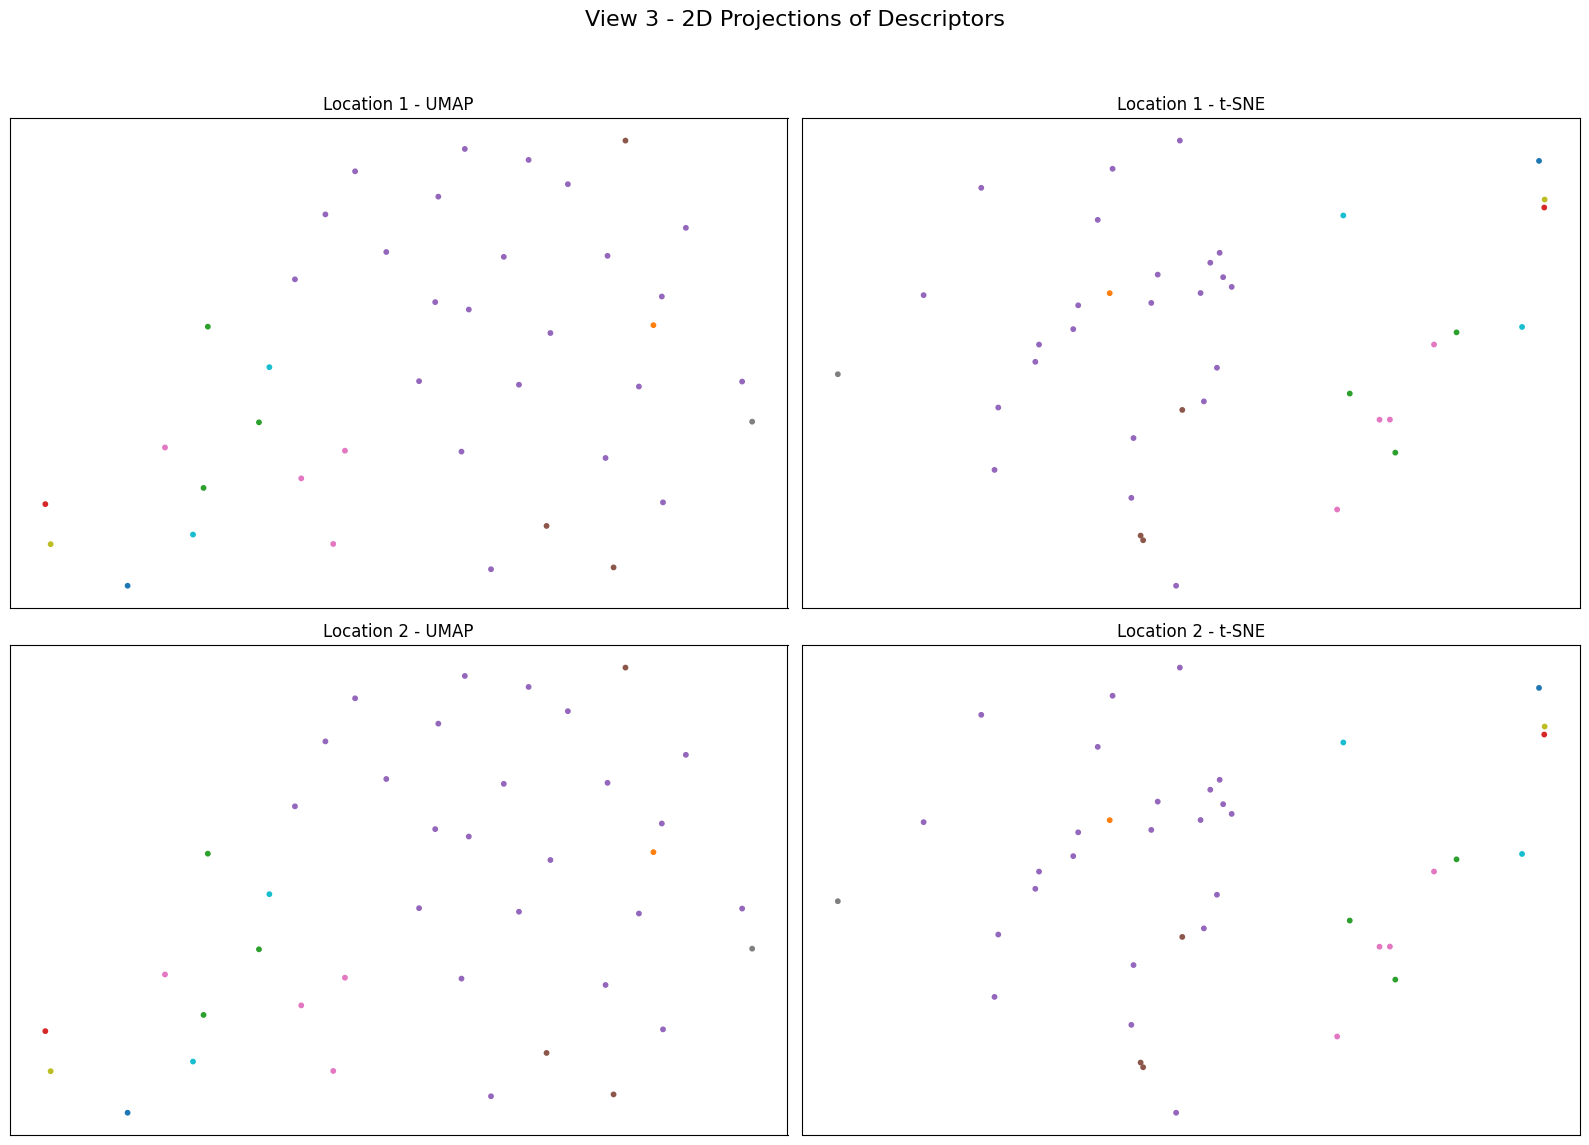

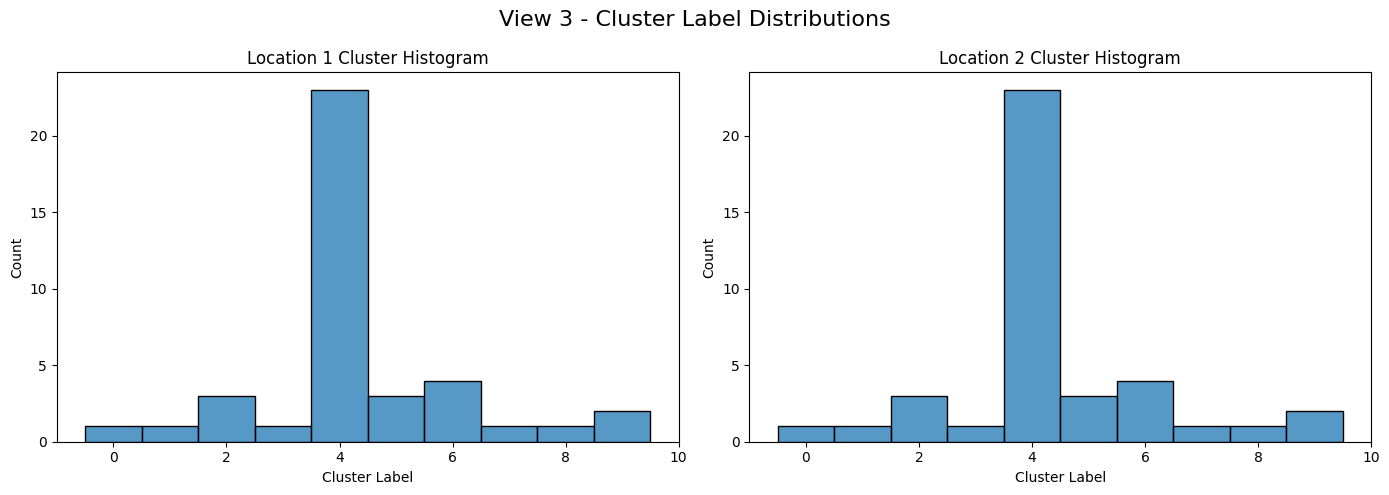

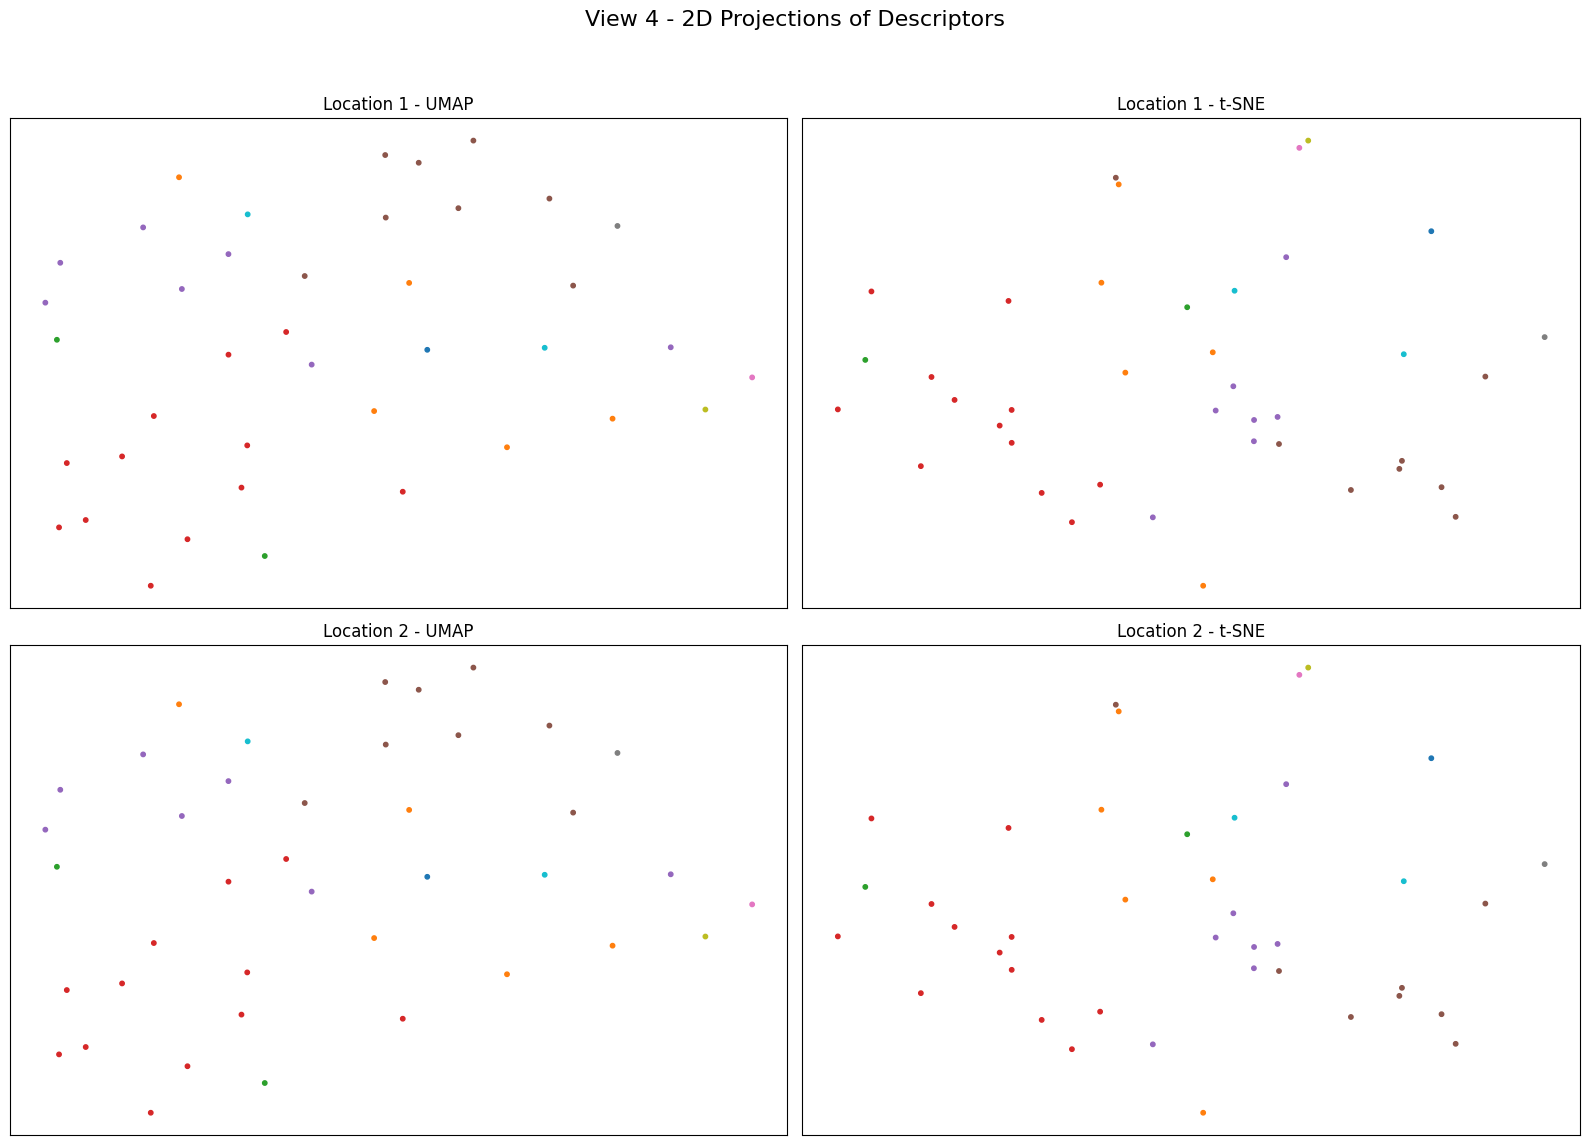

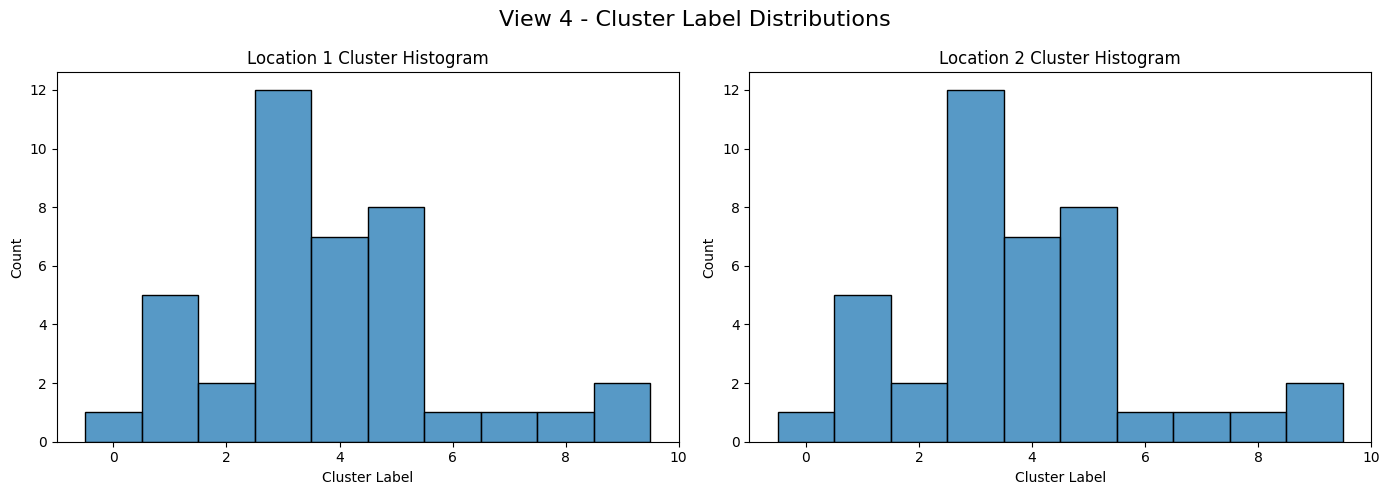

In [15]:
ORB_fast_results_deep = find_images_fast(data_df, "deep", "ORB", plot=True)